### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ
#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 6
### Дисциплина: Интеллектуальный анализ данных

## Москва 2022

### Вариант № 23

1. Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов. 

In [ ]:
import numpy as np
import pandas as pd
import warnings
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

%matplotlib inline
lb_make = LabelEncoder()

In [ ]:
def plot_decision_boundary(X,y,model):
    axis=[X[:,0].min()-1,X[:,0].max()+1,X[:,1].min()-1,X[:,1].max()+1]
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel(), [X[:,2].mean()]*503088   ,[X[:,3].mean()]*503088   ,[X[:,4].mean()]*503088   ]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/coil-mld/analysis.data", delimiter=",", header=None)

2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Преобразуйте категориальные признаки в числовые при помощи кодирования меток (label encoding). Если в признаках имеются пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании.


In [23]:
data = data.replace('?', np.NaN)
print (data[0].isna().sum())
print (data.info())

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       200 non-null    object 
 1   1       200 non-null    object 
 2   2       200 non-null    object 
 3   3       200 non-null    object 
 4   4       200 non-null    object 
 5   5       200 non-null    object 
 6   6       200 non-null    object 
 7   7       200 non-null    object 
 8   8       200 non-null    object 
 9   9       200 non-null    object 
 10  10      200 non-null    object 
 11  11      200 non-null    float64
 12  12      200 non-null    float64
 13  13      200 non-null    float64
 14  14      200 non-null    float64
 15  15      200 non-null    float64
 16  16      200 non-null    float64
 17  17      183 non-null    float64
dtypes: float64(7), object(11)
memory usage: 28.2+ KB
None


In [24]:
for i in data.select_dtypes(include=['object']).columns:
    data[i] = lb_make.fit_transform(data[i])
for i in data.columns:
    data[i] = data[i].fillna(data[i].median())
data.isna().sum().sum()

0

3. Используя метод снижения размерности данных, указанный в индивидуальном задании, определите и оставьте в наборе данных пять признаков.


In [21]:
X=data.drop([0],axis=1).astype(float)
X.columns = range(X.columns.size)
y=data[0].astype(int)
from sklearn.feature_selection import SelectKBest,f_classif
print("\nИсходный набор данных:\n",X.head())
test = SelectKBest(score_func=f_classif, k=5)
fit = test.fit(X, y)
print("\nОценки признаков:\n",fit.scores_)
cols = test.get_support(indices=True)
df_new = X.iloc[:,cols]
print("\nОтобранные признаки:\n",df_new.head())


Исходный набор данных:
     0    1     2     3      4      5      6      7      8      9    10    11  \
0  2.0  2.0  37.0  86.0  139.0  176.0  141.0   16.0   54.0  103.0  0.0   0.0   
1  2.0  2.0  51.0  69.0  133.0   47.0  109.0  115.0  143.0   10.0  1.4   7.6   
2  2.0  2.0  41.0  22.0   97.0  164.0  105.0   23.0   63.0   30.0  3.3  53.6   
3  2.0  2.0  40.0  43.0  161.0   85.0  176.0  144.0   34.0   11.0  3.1  41.0   
4  2.0  2.0  39.0  79.0  131.0   79.0   76.0  136.0  184.0   15.0  9.2   2.9   

     12   13    14   15   16  
0   0.0  0.0  34.2  8.3  0.0  
1   4.8  1.9   6.7  0.0  2.1  
2   1.9  0.0   0.0  0.0  9.7  
3  18.9  0.0   1.4  0.0  1.4  
4   7.5  0.0   7.5  4.1  1.0  

Оценки признаков:
 [0.35327014 0.24022029 1.34599885 4.93170414 0.99762285 2.19814226
 1.23553416 2.38231712 2.48280333 0.65249164 0.15514474 0.70451917
 6.28123103 0.32787362 2.15496603 5.0142804  0.05260487]

Отобранные признаки:
      3      7      8     12   15
0  86.0   16.0   54.0   0.0  8.3
1  69.0 

In [10]:
X=X[[12,15,3,8,7]]

,12,15,3,8,7
0,0.0,8.3,86.0,54.0,16.0
1,4.8,0.0,69.0,143.0,115.0
2,1.9,0.0,22.0,63.0,23.0
3,18.9,0.0,43.0,34.0,144.0
4,7.5,4.1,79.0,184.0,136.0


4. Нормализуйте оставшиеся признаки набора данных методом, указанным в индивидуальном задании.


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
rescaledX = pd.DataFrame(scaler.transform(X))
rescaledX.head()

,0,1,2,3,4
0,-0.632861,0.326073,1.483066,-0.715252,-1.324101
1,0.009434,-0.546820,0.889490,0.906800,0.606047
2,-0.378619,-0.546820,-0.751571,-0.551224,-1.187626
3,1.896175,-0.546820,-0.018331,-1.079758,1.171444
4,0.370725,-0.115632,1.238652,1.654037,1.015472


5. Визуализируйте набор данных в виде точек в трехмерном пространстве, отображая точки разных классов разными цветами. При визуализации набора данных используйте три признака с наиболее высокой оценкой важности. В качестве подписей осей используйте названия признаков. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.


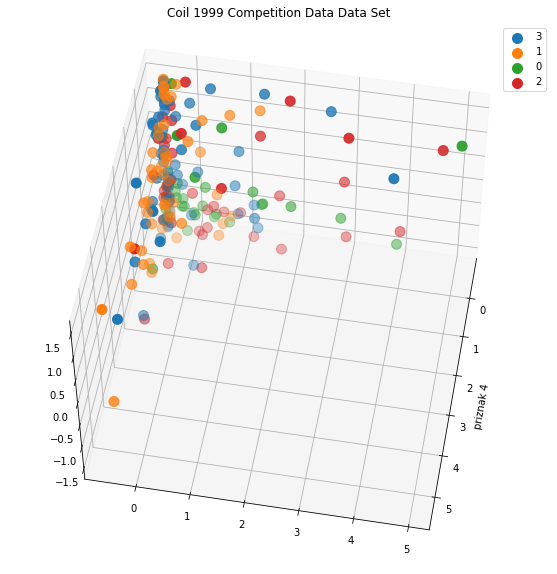

In [25]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
for i in (y.unique()):
    row_ix = np.where(y== i)
    a=rescaledX[[0,1,2]].values[row_ix, 0]
    b=rescaledX[[0,1,2]].values[row_ix, 1]
    c=rescaledX[[0,1,2]].values[row_ix, 2]
    ax.scatter(a, b, c,s=100,label=i )
plt.title('Coil 1999 Competition Data Data Set')
plt.xlabel('priznak 13')
plt.xlabel('priznak 16')
plt.xlabel('priznak 4')
plt.legend()
ax.view_init(azim=10, elev=52);

6. Разбейте набор данных на обучающую и тестовую выборки. Создайте и обучите классификатор на основе деревьев решений с глубиной дерева не более 5, определите долю верных ответов на тестовой выборке и визуализируйте границу принятия решений и построенное дерево решений. При визуализации границы принятия решений используйте два признака с наиболее высокой оценкой важности.


In [13]:
X_train, X_test, y_train, y_test = train_test_split(rescaledX, y, test_size=0.3, random_state=666)
dt_clf = DecisionTreeClassifier(max_depth=4)
dt_clf.fit(X_train, y_train)
y_predict=dt_clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.15

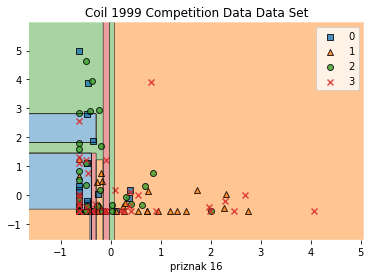

In [29]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train[[0,1]].values,y_train.values,dt_clf.fit(X_train[[0,1]], y_train))
plt.title('Coil 1999 Competition Data Data Set')
plt.xlabel('priznak 13')
plt.xlabel('priznak 16')

plt.legend()

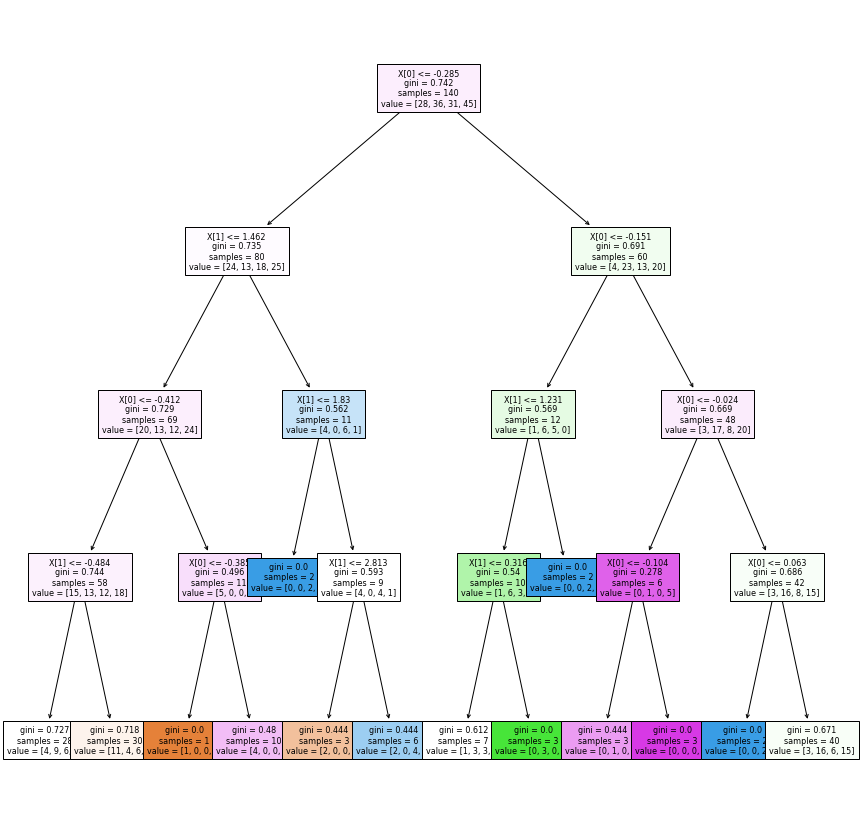

In [15]:
plt.figure(figsize=(15, 15))
plot_tree(dt_clf,filled=True,fontsize=8); 

7. Постройте и обучите дополнительные базовые классификаторы, указанные в индивидуальном задании, затем постройте из классификатора дерева решений и дополнительных классификаторов комбинированный классификатор, указанный в индивидуальном задании. Оцените производительность базовых классификаторов и комбинированного классификатора по показателю, указанному в индивидуальном задании. 


In [17]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(X_train,y_train);

from sklearn.neighbors import KNeighborsClassifier

kNN_clf = KNeighborsClassifier(n_neighbors=5)
dt_clf.fit(X_train, y_train)               
kNN_clf.fit(X_train, y_train)              

from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('GaussianNB', GaussianNB()), 
    ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=5)),
    ('DecisionTreeClassifier', DecisionTreeClassifier(max_depth=4))],
                             voting='hard');
voting_clf.fit(X_train, y_train)

from sklearn.metrics import recall_score
recall_score(y_test, dt_clf.predict(X_test),average='weighted'),recall_score(y_test, nbc.predict(X_test),average='weighted'),recall_score(y_test, kNN_clf.predict(X_test),average='weighted'),recall_score(y_test, voting_clf.predict(X_test),average='weighted')

(0.15, 0.23333333333333334, 0.25, 0.25)

8. Постройте и обучите пару ансамблевых классификаторов, указанных в индивидуальном задании, и сравните их производительность по показателю, указанному в индивидуальном задании. 


In [18]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_jobs=-1)
rf_clf.fit(X_train, y_train)
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
recall_score(y_test, rf_clf.predict(X_test),average='weighted'),recall_score(y_test, gb_clf.predict(X_test),average='weighted')

(0.25, 0.3)

9. Постройте границы принятия решений ансамблевых классификаторов с визуализацией точек набора данных разных классов разными цветами. Подпишите оси и рисунок.

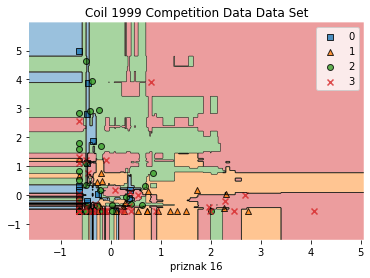

In [28]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train[[0,1]].values,y_train.values,rf_clf.fit(X_train[[0,1]], y_train))
plt.title('Coil 1999 Competition Data Data Set')
plt.xlabel('priznak 13')
plt.xlabel('priznak 16')
plt.legend()

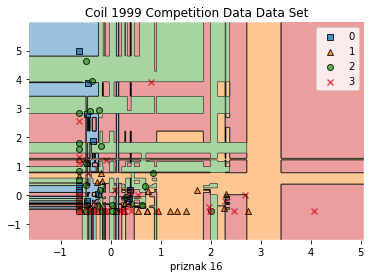

In [27]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train[[0,1]].values,y_train.values,gb_clf.fit(X_train[[0,1]], y_train))
plt.title('Coil 1999 Competition Data Data Set')
plt.xlabel('priznak 13')
plt.xlabel('priznak 16')
plt.legend()